<a href="https://colab.research.google.com/github/URK-KIPLiIS/Python-lessons/blob/main/Sekwencje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sekwencje

* Krzysztof Molenda, (2021-11-05)

---

Programy przetwarzają dane, często nawet ich dużą ilość. W pamięci komputera dane te są zorganizwane w formie tzw. _struktur danych_. W języku Python podstawowymi strukturami danych są: listy (ang. _list_), krotki (ang. _tuple_), zbiory (ang. _set_) oraz słowniki (ang. _dictionary_). Są oczywiście dostępne inne, bardziej wyspecjalizowane struktury, jak również programista może we własny sposób organizować dane w pamięci - dostosowany do rozwiązywanego problemu.

**Sekwencje (ang. _sequence_)** to ciągi elementów (ang. _item_). Kolejność elementów sekwencji jest ustalona, zaś elementy te są ponumerowane. Do elementów tych możemy się odwoływać za pomocą *indeksów* - i to jest główna cecha sekwencji.

Sekwencje mogą być homogeniczne (ich elementy są tego samego typu, np. `string` jest sekwencją znaków i niczego innego) lub niehomogeniczne (np. listy).

Sekwencje mogą być niemodyfikowalne (np. `string`, `tuple`) lub zmiennicze (np. `list`).

Na sekwencjach można wykonywać pewne operacje (wspólnie definiowane, bez względu na szczegółowy typ sekwencji).

---


## Typy sekwencyjne - ogólne własności

Podstawowymi typami sekwencyjnymi są:
* napisy (ang. `string`, w Pythonie nazywane `str`) - ciągi znaków (niemodyfikowalne)
* listy (ang. `list`) - ciągi dowolnych elementów (modyfikowalne)
* krotki (ang. `tuple`) - ciągi dowolnych elementów, o określonej liczebności (niemodyfikowalne)

Typ zmiennej możemy sprawdzić za pomocą funkcji wbudowanej `type()` lub `isinstance()`.

* funkcja `type(nazwa_zmiennej)` zwraca informację o typie zmiennej
* funkcja `isinstance( nazwa_zmiennej, typ_obiektu )` zwraca `True` jeśli zmienna jest podanego typu lub `False` w przeciwnym przypadku.

Przykłady:

In [1]:
# type(<nazwa_zmiennej>) zwraca typ zmiennej w chwili uruchomienia kodu
# isinstance(<nazwa_zmiennej>, <typ>) zwraca True jeśli zmienna jest wskazanego typu

napis = "Ala ma kota"
print( type(napis) )
print( isinstance(napis, str))

lista = [1, 3, 5, 7]
print( type(lista) )
print( isinstance(lista, list))

krotka = (1, 3, 5, 7)
print( type(krotka) )
print( isinstance(krotka, tuple))

<class 'str'>
True
<class 'list'>
True
<class 'tuple'>
True


### Indeksy

Wspólną cechą wszystkich sekwencji jest możliwość dostępu do określonego elementu na podstawie jego indeksu. Wykorzystywany jest w tym celu tzw. _operator indeksu_ - liczba podana w nawiasach kwadratowych `[]`, wskazująca na pozycję elementu w sekwencji. 

**⚠ Sekwencje w Pythonie numerowane są od `0`.**

Przykładowo, w napisie `"Ala ma kota!"` zerowym elementem jest litera `A`, zaś ostatnia litera umieszczona jest na pozycji `11`.

In [2]:
napis = "Ala ma kota!"
print("element 0: ", napis[0] )
print("element 1: ", napis[1] )
print("element 2: ", napis[2] )
print( "...")
print("element 11: ", napis[11] )

element 0:  A
element 1:  l
element 2:  a
...
element 11:  !


Próba odwołania się do elementu o indeksie przekraczającym zakres sekwencji spowoduje błąd typu `IndexError`.

In [3]:
napis = "Ala ma kota!"
print( napis[12] )

IndexError: ignored

W języku Python wprowadzono, dla wygody programistów, **indeksowanie ujemne**:
* jeśli pozycje sekwencji liczone są od początku - stosujemy indeksy nieujemne, zaczynając od `0`
* jeśli pozycje sekwencji liczone są od końca - stosujemy indeksy ujemne, ostatni element ma indeks równy `-1`
* nie ma indeksu `-0`, W Pythonie `-0 == 0`, zatem indeks `-0` wskazuje również na początek napisu.

Zrozumienie istoty numerowania ujemnego ułatwi poniższy rysunek

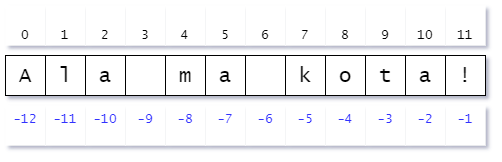

In [4]:
napis = "Ala ma kota!"
print("ostatni: ", napis[-1] )
print("przedostatni: ", napis[-2] )
print("nieosiągalny: ", napis[-20] )

ostatni:  !
przedostatni:  a


IndexError: ignored

Sekwencje można "ciąć na kawałki" za pomocą tzw. mechanizmu fragmentacji (ang. _slicing_).

### Fragmentacja (_slicing_) sekwencji

Z sekwencji można wyodrębniać fragmenty, stosując notację `sekwencja[start : stop : step]`. Parametry `start` oraz `step` są opcjonalne.

* Parametr `start` określa początek przetwarzania sekwencji (włącznie)
* Parametr `stop` określa koniec sekwencji (**wyłącznie**)
* Parametr `step` określa krok, z jakim wyodrębniane będą elementy sekwencji

⚠️ **WAŻNE**: parametr `stop` określa indeks końcowy, ale bez jego osiągnięcia. Zatem podając `liczby[2:4]` wyodrębniamy dwa elementy, o indeksach `2` oraz `3` (ale bez elementu o indeksie `4`).

⚠️ **WAŻNE**: operator fragmentacji `[ : : ]` **tworzy** nową sekwencję w oparciu o zadaną i "przepis" na fragmentację.

In [5]:
liczby = [1, 4, 5, 3, 5, 7, 8, 5]
fragment1 = liczby[2]     # element o indeksie 2
print(fragment1)
fragment2 = liczby[2:4]   # elementy o indeksach od 2 do 3 włącznie
print(fragment2)
fragment3 = liczby[2:7:2] # elementy o indeksach od 2 do 6 włącznie, z krokiem 2
print(fragment3)

5
[5, 3]
[5, 5, 8]


Stosując notację fragmetatorów możemy, w bardzo zwięzły sposób określić wyodrębniane podsekwencje:
* `seq[:]` - wszystkie elementy (wykonuje kopię)
* `seq[1:]` - elementy od drugiego do ostatniego
* `seq[::2]` - co drugi element sekwencji
* `seq[::-1]` - sekwencja odwrócona

In [6]:
napis = "Ala ma kota!"
odwrotnie = napis[::-1]
print(odwrotnie)

!atok am alA


⚠️ **UWAGA**: stosowanie ujemnego kroku wymaga odwrotnego podania parametrów `start` oraz `stop`.

* `sekwencja[high:low:-step]` - startuje od indeksu `high` i zmierza do indeksu `low` (z wykluczeniem) z krokiem `-step`. Warunek: `high > low`
* `sekwencja[high::-step]` - startuje od indeksu `high` i z ujemnym krokiem `-step` zmierza do indeksu `0` (do początku)
* `sekwencja[:low:-step]` - startuje od ostatniej wartości i zmierza do wartości o indeksie `low` (z jej wykluczeniem) z krokiem ujemnym `-step`

In [7]:
liczby = [1, 2, 3, 4, 5, 6, 7, 8]
print( liczby[6:1:-1] ) # poprawnie
print( liczby[2:7:-1] ) # niepoprawnie, wynik pusty

[7, 6, 5, 4, 3]
[]


⚠️ **UWAGA**: nie są weryfikowane parametry `start`, `stop` oraz `step` - w określonych przypadkach po prostu zwracany jest pusty wynik.

🛈 Ciekawostka: krotka 1-elementowa, aby uniknąć niejednoznaczności, zapisywana jest w nawiasach okrągłych, przy czym jedyny element jest zakończony przecinkiem.

In [8]:
krotka = (1, 2, 3, 4, 5, 6)
print( krotka[::10] ) # wybierz co dziesiąty element

(1,)


## Operacje na sekwencjach

### Operatory konkatencji i multiplikacji

Sekwencje (a więc listy, krotki, napisy, ...) mogą być łączone ze sobą. Wykorzystywane są w tym celu dwa operatory:
* operator `+` do sklejania (konkatenacji)
* operator `*` do zwielokrotniania (multiplikacji)

Efektem ich działania jest utworzenie nowego obiektu tego samego typu, co argumenty.

In [10]:
napis1 = "Ala ma kota!"
napis2 = "As to Ali pies."
napis = napis1 + " " + napis2
print("sklejony napis: ", napis)

krotka1 = (1, 3, 5)
krotka2 = (2, 4)
krotka = krotka1 + krotka2
print("sklejona krotka: ", krotka)

lista1 = [1, 3, 5, 6]
lista2 = ['a', 'b']
lista = lista1 + lista2
print("sklejona lista: ", lista)

sklejony napis:  Ala ma kota! As to Ali pies.
sklejona krotka:  (1, 3, 5, 2, 4)
sklejona lista:  [1, 3, 5, 6, 'a', 'b']


In [12]:
napis1 = " Hurra!"
napis = "Koniec zajęć." + napis1*3 
print(napis)

krotka1 = (1, 0, 0)
krotka = 3*krotka1
print(krotka)

lista1 = [1, 2]
lista2 = ['a']
lista = 2*(lista1 + 3*lista2)
print(lista)

Koniec zajęć. Hurra! Hurra! Hurra!
(1, 0, 0, 1, 0, 0, 1, 0, 0)
[1, 2, 'a', 'a', 'a', 1, 2, 'a', 'a', 'a']


Operatory konkatenacji i multiplikacji nie pozwalają na mieszanie typów. Na przykład próba sklejenia krotki do listy spowoduje błąd.

In [13]:
napis = "abc";
krotka = ('a', 'b', 'c')
lista = ['a', 'b', 'c']

sklejka = napis + lista

TypeError: ignored

### Standardowe funkcje operujące na **sekwencjach**

### Operator równości `==` i nierówności `!=`

Sekwencje można porównywać (sprawdzać, czy są sobie równe) operatorem `==`. W tym przypadku weryfikowane są kolejno warunki:

1. czy obie sekwencje są tej samej długości,
2. czy odpowiadające sobie elementy są sobie równe

In [15]:
lista1 = [1, 2, 3, 4]
lista2 = [1, 2, 3, 4]
lista3 = [1, 2, 3]
lista4 = [1, 2, 3, 5]
print( lista1 == lista2 )
print( lista1 == lista3 )
print( lista1 == lista4 )

True
False
False


#### Funkcja `len()`

Sekwencje, jako ciągi elementów, mają określoną długość (liczebność). Do określenia liczby elementów sekwencji służy wbudowana funkcja `len()` (skrót od angielskiego _length_).

In [16]:
napis = "Ala ma kota!"
print( len(napis) )

miasta = ["Kraków", "Poznań", "Katowice", "Gdańsk"]
print( len(miasta) )

wektor = (1, 2, 3)
print( len(wektor) )

12
4
3


#### Operator `in`

Do sprawdzenia, czy dany element _znajduje się_ w sekwencji, służy operator `in`. Wynikiem jego działania jest wartość logiczna `True` lub `False`. Operator ten można łączyć z operatorem `not`, zatem konstrukcja `not in` oznacza: _nie znajduje się_.

In [17]:
napis = "Ala ma kota!"
print( 'a' in napis )
print( 'r' in napis )
print( 'r' not in napis )
print( not 'r' in napis )

True
False
True
True


#### Metoda `.index()`

Wszystkie sekwencje "wyposażone" są w metodę `sekw.index(e)` zwracającą indeks pierwszego wystąpienia elementu `e` w podanej przed kropką sekwencji `sekw`.

In [18]:
napis = "Ala ma kota!"
print("pierwsze wystąpienie A:", napis.index('A') )
print("pierwsze wystąpienie a:", napis.index('a') )
print("pierwsze wystąpienie !:", napis.index('!') )

pierwsze wystąpienie A: 0
pierwsze wystąpienie a: 2
pierwsze wystąpienie !: 11


 W przypadku braku wskazanego elementu w sekwencji, zwracany jest błąd.

In [19]:
napis = "Ala ma kota!"
print( napis.index('r') ) # litery 'r' nie ma w napisie

ValueError: ignored

Metoda `index` może być użyta w rozszerzonym zakresie. Dysponuje dwoma opcjonalnymi parametrami: `start` oraz `stop`. Parametry te służą do zawężania obszaru przeszukiwania - od `start` do `stop` ale bez `stop`.

Formalna definicja:

```python
seq.index( element, start(optional), stop(optional) )
```

In [20]:
napisy = ["aa", "bb", "cc", "dd", "aa", "aa", "aa", "dd", "ff", "cc"]
print( napisy.index("aa", 3, 8) ) # zwraca pierwsze wystąpienie elementu "aa" w pod-sekwencji, licząc od indeksu 3 do 8 (bez 8)

4


Jeśli nie podano wartości ostatniego parametru `stop`, poszukiwania zaczynają się od indeksu `start` do końca sekwencji.

In [21]:
napisy = ["aa", "bb", "cc", "dd", "aa", "aa", "aa", "dd", "ff", "cc"]
print( napisy.index("dd", 4) ) # zwraca pierwsze wystąpienie elementu "dd" w pod-sekwencji, licząc od indeksu 4 do końca

7


#### Metoda `.count()`

Dla wszystkich sekwencji możemy zliczać wystąpienie konkretnego elementu `e` metodą `sekwencja.count( e )`.

In [22]:
dane = [1, 4, 3, 2, 5, 1, 5, 3, 1, 6, 1, 1, 2, 3, 5]
print("liczba wystąpień 1: ", dane.count(1))
print("liczba wystąpień 7: ", dane.count(7))

liczba wystąpień 1:  5
liczba wystąpień 7:  0


#### Konwersje sekwencji na inne typy

Sekwencje możemy konwertować między sobą, tzn. np. sekencję typu _krotka_ (która jest niemodyfikowalna) możemy zamienić na sekwencję typu _lista_, a dla tej można już zmieniać wartości. Później możemy wykonać konwersję odwroną. Funkcje konwertujące:
* `tuple(sekwencja)` - zamienia inną sekwencję na krotkę
* `list(sekwencja)` - zamienia inną sekwencję na listę

In [24]:
napis = "Ala ma kota!"
krotka_liter = tuple(napis) # konwertujemy string na krotkę znaków
print(krotka_liter)

lista_liter = list(napis) # konwertujemy string na listę znaków
print(lista_liter)

lista_liter[0] = 'a' # modyfikujemy zerowy element listy
print(lista_liter)
napis1 = "".join(lista_liter) # łączymy elementy listy w string używając separatora pusty znak
print(napis1)

('A', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a', '!')
['A', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a', '!']
['a', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a', '!']
ala ma kota!


#### Inne metody wspólne dla sekwencji

Jeśli elementy sekwencji są **porównywalne** (można ustalić, który element jest większy, a który mniejszy), można zastosować funkcje wbudowane `min()` oraz `max()`.

W przypadku napisów, porządek nazywany jest _leksykograficznym_ (encyklopedycznym).

In [25]:
napisy = ["aa", "bb", "cc", "dd", "aa", "aa", "aa", "dd", "ff", "cc"]
print("min:", min(napisy))
print("max:", max(napisy))
liczby = [1, 4, 5, 3, 5, 7, 8, 5]
print("min:", min(liczby))
print("max:", max(liczby))


min: aa
max: ff
min: 1
max: 8


In [26]:
lista_niehomogeniczna = [1, 2, 'a', "ala", [1, 2], []]
print( max(lista_niehomogeniczna) )

TypeError: ignored

W przypadku, gdy elementami sekwencji są liczby, możemy obliczyć sumę tych elementów za pomocą wbudowanej funkcji `sum(sekwencja_liczb)`

In [27]:
liczby = [1, 4, 5, 3, 5, 7, 8, 5]
print("suma = ", sum(liczby) )
print("średnia arytmetyczna = ", sum(liczby)/len(liczby) )

suma =  38
średnia arytmetyczna =  4.75


### Modyfikowalność i niezmienniczość

Sekwencje (ale również ogólnie: obiekty) mogą być **niemodyfikowalne** (ang. _immutable_) lub mogą zmieniać swoją zawartość (ang. _mutable_). Na przykład napisy oraz krotki są niemodyfikowalne - ich stan, po utworzeniu, nie może ulec zmianie. Zawartość listy można natomiast zmieniać.

Na przykład próba modyfikacji dużej litery `A` w napisie `Ala ma kota` na literę małą `a` zgłosi błąd z komentarzem `TypeError: 'str' object does not support item assignment`.

In [28]:
napis = "Ala ma kota"
print( napis[0] )
napis[0] = 'a'

A


TypeError: ignored

Podobna sytuacja wystąpi w przypadku próby modyfikacji krotki (błąd: `TypeError: 'tuple' object does not support item assignment`)

In [29]:
krotka = (1, 3, 5, 7)
print( krotka[2] )
krotka[2] = 4

5


TypeError: ignored

Natomiast listy mogą ulegać zmianie podczas ich "życia" w programie

In [30]:
lista = [1, 3, 5, 7]
print( lista[2] )
lista[2] = 4
print( lista )

5
[1, 3, 4, 7]


### Wykorzystanie slice'rów do modyfikacji list

Sekwencje zmiennicze (_mutable_), a przykładem jest lista, mogą być modyfikowane przy użyciu slice'rów.

Działania wykonywane są bezpośrednio na liście.

Poniżej kilka przykładów.

In [31]:
# modyfikacja wybranego fragmentu listy
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9]
lista[:3] = ["jeden", "dwa", "trzy"] # modyfikujemy 3 pierwsze elementy listy
print( lista )

['jeden', 'dwa', 'trzy', 4, 5, 6, 7, 8, 9]


In [33]:
# usuwanie z listy wybranego fragmentu
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9]
lista[:3] = [] # wycinamy z listy trzy pierwsze elementy (zastępujemy je listą pustą)
print( lista )
del lista[:-4:-1] # alternatywnie można użyć instrukcji `del` (tu: usuwamy 3 ostatnie)
print( lista )

[4, 5, 6, 7, 8, 9]
[4, 5, 6]


In [34]:
# usuwanie z listy co drugiego elementu
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
del lista[::2]
print( lista )

[2, 4, 6, 8, 10]


In [35]:
# zamiana co drugiego elementu listy nową wartością
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lista[::2] = [100]*(len(lista)//2 + len(lista)%2)
print( lista )

[100, 2, 100, 4, 100, 6, 100, 8, 100, 10]


In [36]:
# doklejenie do listy nowego elementu
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9]
lista[len(lista):len(lista)] = [10]
print( lista )
# równoważne: metoda `append`
lista.append(11)
print( lista )

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [37]:
# doklejenie do listy innej listy
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9]
lista[len(lista):len(lista)] = ["a", "b", "c"]
print( lista )
# równoważne: metoda extend
lista.extend(["x", "y"])
print( lista )
# równoważne: lista += doklejana_lista
lista += [2.1, 2.2, 2.3]
print( lista )

[1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c', 'x', 'y']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c', 'x', 'y', 2.1, 2.2, 2.3]


## Odwołania (referencje)

Sekwencje są obiektami, przechowującymi wiele danych. Zmienna, której przypisano sekwencję, przechowuje jej referencję, a nie same wartości. Ma to konsekwencje w przypadku działania operatora przypisania `=`.

Jeśli wykonamy operację przypisania obiektu do zmiennej, to w zmiennej zapamiętana zostanie referencja do tego obiektu, nie dane.

```python
l = [1, 2, 3, 4, 5] # l jest referencją
```

Jeśli teraz wykonamy przypisanie

```python
l1 = l
```

to w zmiennej `l1` będzie **kopia referencji**, nie kopia sekwencji!

In [38]:
lista = ["a", "b", "c"] # utworzenie obiektu i przypisanie go do zmiennej `lista`
print(lista)
lista1 = lista # do zmiennej `lista1` przypisujemy zmienną `lista` - tworzymy alias, a nie kopię kolekcji
print(lista1)
lista[0] = "X" # zmiany w obiekcie wskazywanym przez `lista`
print(lista1)  # zmiany widoczne w `lista1`, bo obie zmienne wskazują na ten sam obiekt

['a', 'b', 'c']
['a', 'b', 'c']
['X', 'b', 'c']


[Wizualizacja](https://pythontutor.com/visualize.html#code=lista%20%3D%20%5B%22a%22,%20%22b%22,%20%22c%22%5D%0Aprint%28lista%29%0Alista1%20%3D%20lista%0Aprint%28lista1%29%0Alista%5B0%5D%20%3D%20%22X%22%0Aprint%28lista1%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

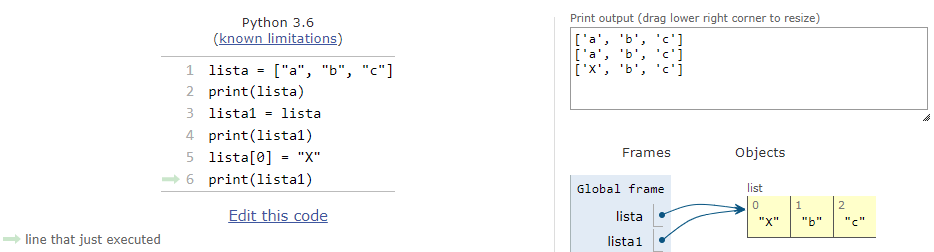

Dla porównania, wykonamy teraz kopię obiektu sekwencji:

In [39]:
lista = ["a", "b", "c"]
lista1 = lista[:]          # kopia sekwencji
print("lista →", lista)
print("lista1 →", lista1)

lista[0] = "X"             # zmieniamy element obiektu wskazywanego przez lista
print("lista →", lista)    # i widzimy, że zmiana została wprowadzona
print("lista1 →", lista1)  # ale nie w obiekcie wskazywanym przez lista1

lista → ['a', 'b', 'c']
lista1 → ['a', 'b', 'c']
lista → ['X', 'b', 'c']
lista1 → ['a', 'b', 'c']


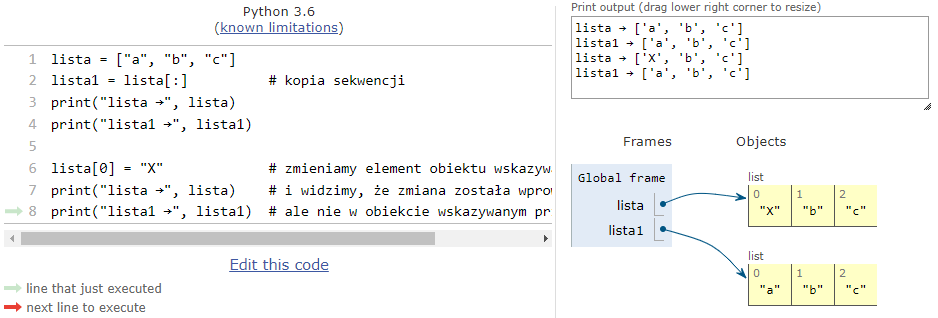

[Wizualizacja](https://pythontutor.com/visualize.html#code=lista%20%3D%20%5B%22a%22,%20%22b%22,%20%22c%22%5D%0Alista1%20%3D%20lista%5B%3A%5D%20%20%20%20%20%20%20%20%20%20%23%20kopia%20sekwencji%0Aprint%28%22lista%20%E2%86%92%22,%20lista%29%0Aprint%28%22lista1%20%E2%86%92%22,%20lista1%29%0A%0Alista%5B0%5D%20%3D%20%22X%22%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20zmieniamy%20element%20obiektu%20wskazywanego%20przez%20lista%0Aprint%28%22lista%20%E2%86%92%22,%20lista%29%20%20%20%20%23%20i%20widzimy,%20%C5%BCe%20zmiana%20zosta%C5%82a%20wprowadzona%0Aprint%28%22lista1%20%E2%86%92%22,%20lista1%29%20%20%23%20ale%20nie%20w%20obiekcie%20wskazywanym%20przez%20lista1&cumulative=false&curInstr=7&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

## Inne sekwencje

Python dostarcza również inne, niż wspomniane (`str`, `tuple`, `list`) typy sekwencji tj.: `bytearrays`, `range` oraz `bytes`.

### Sekwencja `range`

Typ `range` reprezentuje niezmienniczą sekwencję liczb całkowitych wygenerowaną z podanego zakresu i z odpowiednim krokiem. Najczęściej wykorzystywana jest do iteracji za pomocą pętli `for`. 

Sekwencję tę tworzymy metodą `range(start, stop, step)`, przy czym parametry `start` oraz `step` są opcjonalne, zaś `stop` obowiązkowy. Jeśli nie podano, `start` domyślnie wynosi `0`, zaś `step` wynosi `1`. Parametr `step` nie może przyjąć wartości `0` - zgłoszony wtedy będzie wyjątek `ValueError`.

Do elementów obiektu `range` odwołujemy się za pomocą operatora indeksowania `[]`, jak dla innych sekwencji.

Obiekt typu `range` dostarcza tzw. _iterator_, za pomocą którego można przeglądać jego zawartość (ten fakt wykorzystuje pętla `for`). Można jednak ten obiekt wykorzystać do wygenerowania konkretnej sekwencji, najczęściej listy lub krotki.






In [40]:
r = range(1, 10, 1)
print( f"r[5] = {r[5]}" )
print( r )
print( list(r) )   # lista liczb utworzona z obiektu `r`
print( tuple(r) )  # krotka liczb utworzona z obiektu `r`

r[5] = 6
range(1, 10)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
(1, 2, 3, 4, 5, 6, 7, 8, 9)


Przykłady:

In [41]:
print( list( range(5) ) )          # lista liczb od 0 do 5 (bez 5)
print( list( range(1, 11) ) )      # lista liczb od 1 do 10
print( list( range(1, 10, 2)) )    # kolejne liczby nieparzyste, mniejsze od 10
print( list( range(0, -10, -1) ) ) # kolejne liczby ujemne
print( list( range(0) ) )          # lista pusta

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 5, 7, 9]
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]
[]


**WAŻNE**: Zaletą obiektu `range` w porównaniu do list oraz krotek jest to, że obiekt typu `range` praktycznie nie zajmuje pamięci (przechowuje jedynie parametry, na podstawie których, na żądanie, generowana jest sekwencja). 

`range` obsługuje pozostałe metody, w tym: ujemne indeksy, slicing, wyszukiwanie indeksu, obliczenia arytmetyczne, ...

In [ ]:
zakres = range(1, 10, 2)
print( 3 in zakres )
print( 4 in zakres )

print( zakres )
print( zakres[:4] )   # zawężenie
print( zakres[:7] )   # rozszerzenie
print( zakres[::-1] ) # odwrócenie

True
False
range(1, 10, 2)
range(1, 9, 2)
range(1, 11, 2)
range(9, -1, -2)


**WAŻNE**: sekwencja typu `range` nie obsługuje operacji konkatenacji (`+`) oraz multiplikacji (`*`). Obsługuje pozostałe metody, w tym: ujemne indeksy, _slicing_, wyszukiwanie indeksu, obliczenia arytmetyczne, ...

W pakiecie `itertools` dostarczane są dodatkowe wydajne techniki iteracyjnego przetwarzania sekwencji.

In [42]:
r1 = range(0, 10, 2) # parzyste
r2 = range(1, 10, 2) # nieparzyste
# r = r1 + r2        # błąd, konkatenacja nie jest dozwolona
from itertools import chain
r = chain(r1, r2)
print( list(r) )

[0, 2, 4, 6, 8, 1, 3, 5, 7, 9]


**TIP**: Jeśli chcemy utworzyć zakres **włącznie** z określonym elementem, do `stop` dodajemy `step`:

In [43]:
zakres = range(1, 10, 2)
print( list(zakres) )
step = 2
zakres_wlacznie = range( 1, 10+step, step )
print( list(zakres_wlacznie) )

[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9, 11]


## Przetwarzanie sekwencji

Sekwencje przetwarzamy za pomocą:

* instrukcji pętli `for` oraz `while`
* w przypadku list, mechanizmu generowania - tzw. _list comprehension_

In [44]:
# kwadraty liczb parzystych - pętlą for
lista = []
for x in range(20):
  if x % 2 == 0:
    lista.append(x*x)

print(lista)

# kwadraty liczb parzystych - list comprehension
lista = [x*x for x in range(20) if x % 2 == 0]
print( lista )

lista = [x*x for x in range(20)[::2] ]
print( lista )

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324]
[0, 4, 16, 36, 64, 100, 144, 196, 256, 324]
[0, 4, 16, 36, 64, 100, 144, 196, 256, 324]


## Bibliografia

* [Sequence types - lists, tuples, range](https://docs.python.org/3/library/stdtypes.html#typesseq) - oficjalna dokumentacja Python'a